----
#**IMDb Rating Prediction Project: ML Regression**

----

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/IMDb_ML_Regression.csv')

In [3]:
df

,released,genres,director,top_5_casts,year,rating,overview_plot_keyword
0,0.0,Action,Joseph Kosinski,Jack Epps Jr.,2022.0,8.6,thirti year servic one navi s top aviat pete m...
1,0.0,Action,Joseph Kosinski,Peter Craig,2022.0,8.6,thirti year servic one navi s top aviat pete m...
2,0.0,Action,Joseph Kosinski,Tom Cruise,2022.0,8.6,thirti year servic one navi s top aviat pete m...
3,0.0,Action,Joseph Kosinski,Jennifer Connelly,2022.0,8.6,thirti year servic one navi s top aviat pete m...
4,0.0,Action,Joseph Kosinski,Miles Teller,2022.0,8.6,thirti year servic one navi s top aviat pete m...
...,...,...,...,...,...,...,...
283610,0.0,Musical,Joseph L. Mankiewicz,Abe Burrows,1955.0,7.1,new york gambler challeng take cold femal miss...
283611,0.0,Musical,Joseph L. Mankiewicz,Damon Runyon,1955.0,7.1,new york gambler challeng take cold femal miss...
283612,0.0,Musical,Joseph L. Mankiewicz,Marlon Brando,1955.0,7.1,new york gambler challeng take cold femal miss...
283613,0.0,Musical,Joseph L. Mankiewicz,Jean Simmons,1955.0,7.1,new york gambler challeng take cold femal miss...


Due to RAM limitatiom, only 'released' and 'genres' will be used as feature other than 'overview' and 'plot_keyword'

In [4]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['released', 'genres']

encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

encoder_df = pd.DataFrame(one_hot_encoded.toarray(), columns = encoder.get_feature_names_out(categorical_columns))

In [5]:
encoder_df.head(5)

,released_0.0,genres_Action,genres_Adult,genres_Adventure,genres_Animation,genres_Biography,genres_Comedy,genres_Crime,genres_Drama,genres_Family,...,genres_Music,genres_Musical,genres_Mystery,genres_Reality-TV,genres_Romance,genres_Sci-Fi,genres_Sport,genres_Thriller,genres_War,genres_Western
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features = 800)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['overview_plot_keyword'])

In [7]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns = tfidf_vectorizer.get_feature_names_out())

In [8]:
tfidf_df

,1930,1940,1950,1960,1970,1980,1990,abandon,abduct,abus,...,worker,world,writer,written,wrong,year,york,young,younger,zombi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.125522,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.125522,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.125522,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.125522,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.125522,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.404804,0.0,0.0,0.0
283611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.404804,0.0,0.0,0.0
283612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.404804,0.0,0.0,0.0
283613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.404804,0.0,0.0,0.0


In [9]:
encoder_df

,released_0.0,genres_Action,genres_Adult,genres_Adventure,genres_Animation,genres_Biography,genres_Comedy,genres_Crime,genres_Drama,genres_Family,...,genres_Music,genres_Musical,genres_Mystery,genres_Reality-TV,genres_Romance,genres_Sci-Fi,genres_Sport,genres_Thriller,genres_War,genres_Western
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283610,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283611,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283612,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283613,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df_feature_final = pd.concat([encoder_df, tfidf_df], axis = 1)

In [11]:
df_feature_final = pd.concat([df_feature_final, df['rating']], axis = 1)

In [12]:
df_feature_final

,released_0.0,genres_Action,genres_Adult,genres_Adventure,genres_Animation,genres_Biography,genres_Comedy,genres_Crime,genres_Drama,genres_Family,...,world,writer,written,wrong,year,york,young,younger,zombi,rating
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.125522,0.000000,0.0,0.0,0.0,8.6
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.125522,0.000000,0.0,0.0,0.0,8.6
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.125522,0.000000,0.0,0.0,0.0,8.6
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.125522,0.000000,0.0,0.0,0.0,8.6
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.125522,0.000000,0.0,0.0,0.0,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283610,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.404804,0.0,0.0,0.0,7.1
283611,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.404804,0.0,0.0,0.0,7.1
283612,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.404804,0.0,0.0,0.0,7.1
283613,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.404804,0.0,0.0,0.0,7.1


In [13]:
df_final = df_feature_final.drop_duplicates().reset_index(drop = True)

In [14]:
df_final

,released_0.0,genres_Action,genres_Adult,genres_Adventure,genres_Animation,genres_Biography,genres_Comedy,genres_Crime,genres_Drama,genres_Family,...,world,writer,written,wrong,year,york,young,younger,zombi,rating
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.125522,0.000000,0.000000,0.0,0.0,8.6
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.0,0.125522,0.000000,0.000000,0.0,0.0,8.6
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.166161,0.0,0.0,0.0,0.153376,0.000000,0.000000,0.0,0.0,6.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.166161,0.0,0.0,0.0,0.153376,0.000000,0.000000,0.0,0.0,6.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.166161,0.0,0.0,0.0,0.153376,0.000000,0.000000,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56676,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.164813,0.0,0.0,6.4
56677,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.164813,0.0,0.0,6.4
56678,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.404804,0.000000,0.0,0.0,7.1
56679,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.404804,0.000000,0.0,0.0,7.1


#**Splitting Independent & Dependent Variable**

In [15]:
X = df_final.drop('rating', axis = 1)
y = df_final['rating'].values

In [16]:
X = X.values

In [17]:
y

array([8.6, 8.6, 6. , ..., 7.1, 7.1, 7.1])

In [18]:
X

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

#**Train Test Split**

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [20]:
X_train, X_test, y_train, y_test

(array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.        , 0.        , ..., 0.11358877, 0.        ,
         0.        ],
        [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [1. 

#**Applying Random Forest Regression**

In [21]:
from sklearn.ensemble import RandomForestRegressor

randomforest = RandomForestRegressor(n_estimators = 25, random_state = 0)
randomforest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25, random_state=0)

#**Predictions**

In [22]:
X_test

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.18509459, 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [23]:
print(y_test)

[5.7 7.  6.1 ... 6.1 4.6 5.7]


In [24]:
y_pred = randomforest.predict(X_test)
print(y_pred)

[5.94       6.63133333 5.844      ... 6.252      4.988      6.45745455]


#**Model Evaluation**

In [25]:
from sklearn.metrics import mean_absolute_error

mae = (mean_absolute_error(y_test, y_pred))
print(mae)

0.80272861114325


#**Data Visualization**

Text(0.5, 1.0, 'Prediction Analysis')

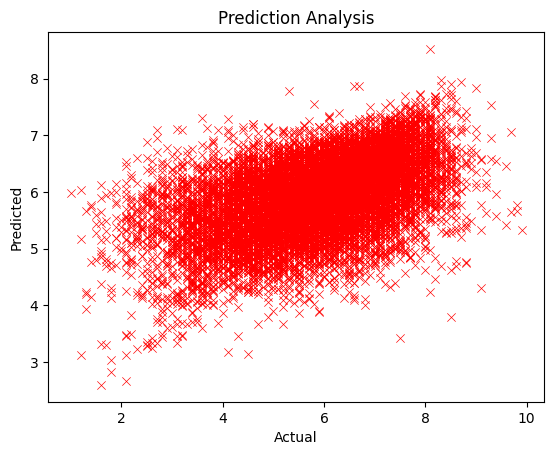

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = y_test, y = y_pred, color = 'red', marker = 'x')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Prediction Analysis')

A mean error of 0.80 is almost about difference in +-1 rating. The accuracy can be improved by adding more features or hyperparameter tuning for Random Forest Regression ie. using more trees.